#**Interferencia y difracción de ondas**#

Cuando en un lugar tenemos dos o más ondas propagándose en el mismo medio, y estas se cruzan en un punto, dichas ondas **interfieren**.

Una *interferencia* es la superposición de dos o más ondas que tiene lugar en un punto cuando es alcanzado por varias ondas a la vez.

Para formar un patrón de interferencia, la luz incidente debe satisfacer dos condiciones:

(i) Las fuentes de luz deben ser coherentes. Esto significa que las ondas planas de las fuentes deben mantener una relación de fase constante.
(ii) La luz debe ser monocromática. Esto significa que la luz consta de una sola longitud de onda.

En esta práctica vamos a estudiar mediante el uso del lenguaje python los fenómenos de interferencia y difracción de ondas. Para ello usaremos representaciones gráficas que nos permitirán visualizar fácilmente estos fenómenos. 

Comenzaremos representando una onda plana monocromática propagándose en la dirección del eje $x$. La ecuación correspondiente a esta onda la escribimos como

$$\xi(x,t)=\xi_0 \sin(k x- \omega t+\delta),$$

donde $\xi$ representa la magnitud física que se propaga (presión, desplazamiento, etc.), $\xi_0$ la amplitud de la onda, $\delta$ una fase inicial, $k$ el número de ondas y $\omega$ la frecuencia angular. Recordemos que $k=2\pi/\lambda$, donde $\lambda$ es la longitud de onda, y que $\omega=2\pi \nu$, siendo $\nu$ la frecuencia. 

Resulta muy útil utilizar la notación compleja para representar una onda, así, la onda  $\xi(x,t)=\xi_0 \sin(k x- \omega t+\delta)$ la podemos escribir, usando la fórmula de Euler,  como la parte imaginaria del complejo
$$
\xi_0 e^{i(k x- \omega t+\delta)},
$$
ya que 
$$
\xi_0 e^{i(k x- \omega t+\delta)}=\xi_0\;[\cos(k x- \omega t+\delta)+i\sin(k x- \omega t+\delta)].
$$

Notemos que la amplitud de la onda no es más que el módulo del número complejo. Usaremos esta forma compleja más adelante para simplificar algunos cálculos. De hecho, la expresión compleja permite escribir la onda como

$$
\xi_0e^{i\delta} \;e^{i(k x- \omega t)}=\xi_{C0}\;e^{i(k x- \omega t)},
$$ 

donde hemos introducido una amplitud compleja $\xi_{C0}$, cuyo módulo nos da la amplitud de la onda.






In [33]:
######################### Cargamos las librerias ##############################
import numpy as np
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import matplotlib.animation as animation
#from scipy.signal import find_peaks
import warnings
import random
warnings.filterwarnings("ignore")


###########################################
DNI=20527092   # introduce tu DNI sin letra
##############################################3



Representemos con phyton una onda en un instante de tiempo dado *t*, con amplitud $\xi_0$, frecuencia angular $\omega$, número de ondas $k$ y fase inicial $\delta$ conocidas.

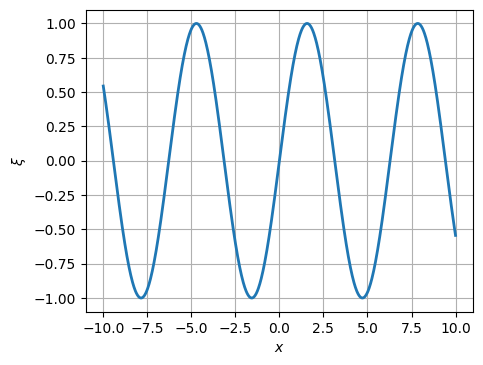

In [34]:
# O1Sin

xi0=1  # Amplitud
omega=1 # Frecuencia
k=1  # Numero de ondas
delta=0 # Fase inicial
t=0 # Tiempo 

nt=1000 # Dimensión de los vectores
x_ini=-10 # Posición inicial
x_fin=10 # Posición final

x=np.linspace(x_ini,x_fin,nt) # Vector de posiciones
xi=xi0*np.sin(k*x-omega*t+delta) # Onda

fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()
line, = ax.plot(x,xi,'-', linewidth=2)

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")

ax.grid(True)
#
plt.show()


In [35]:
#fig.savefig('my_figure.png')

Utilizando números complejos realizaremos la representación anterior.


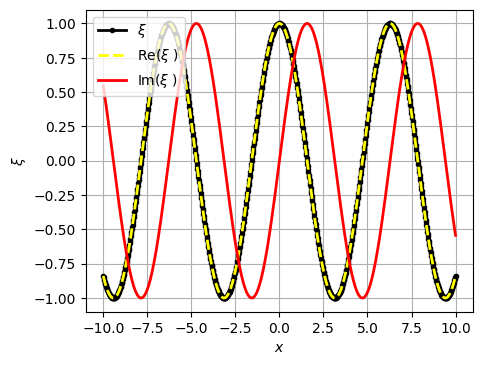

In [36]:
# O2exp
#x=np.linspace(x_ini,x_fin,nt)

alpha=k*x-omega*t+delta;
xi=xi0*np.exp(1j*alpha)
im_xi=np.imag(xi);
re_xi=np.real(xi);

fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()
line0, = ax.plot(x,xi,'.-', linewidth=2, label='$\\xi$ ', color="black")
line1, = ax.plot(x,re_xi,'--', linewidth=2, label='Re($\\xi$ )', color="yellow")
line2, = ax.plot(x,im_xi,'-', linewidth=2, label='Im($\\xi$ )', color="red")

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()

Ahora representaremos la onda en función del tiempo.

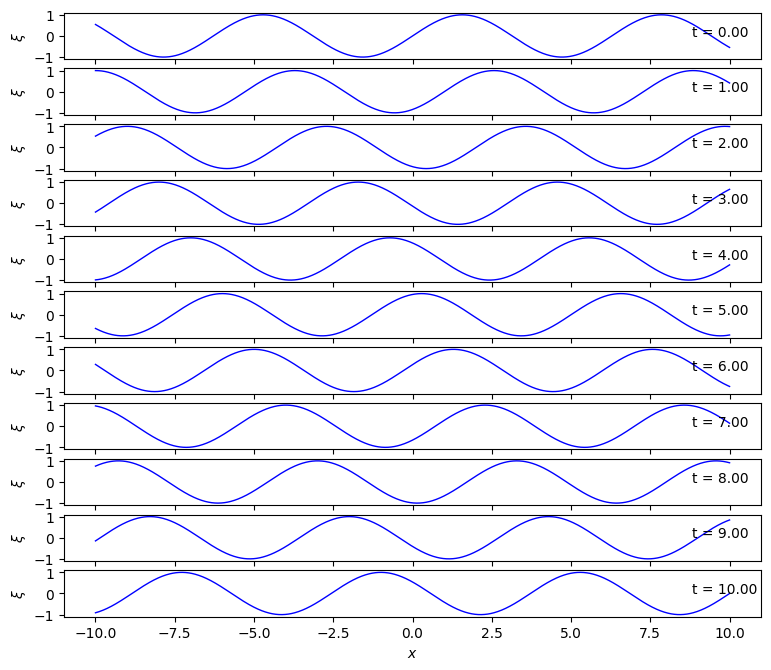

In [37]:
#02Sin en función del tiempo

dt=np.linspace(0,10,11) # vector de tiempos
ndt=np.size(dt)

fig, ax = plt.subplots(ndt)
fig.set_dpi(100)
fig.set_size_inches(9,8)

xi=[]
nwi=0
for ti in dt:
  xi=xi0*np.sin(k*x-omega*ti+delta) # Onda
  
  ax[nwi].plot(x,xi,'-', label='$ \\xi $', linewidth=1, color='blue')  # Onda
  ax[nwi].annotate('t = %0.2f '%(ti), (0.9, 0.5), xycoords='axes fraction')

  # Etiquetas de los ejes x e y
  #ax[nwi].legend(loc='upper left') 
  ax[nwi].set_ylabel("$ \\xi $")
  ax[nwi].set_xlabel("$x$")
  nwi+=1

Observemos que la velocidad de propagación (velocidad de fase) viene dada por el cociente $\omega/k$.

Las ondas pueden interferir de manera que la magnitud física que se propaga ($\xi$, en el ejemplo anterior)  sea suma de la correspondiente a cada onda, ver Figura 1.  

![Interferencia](https://drive.google.com/uc?export=view&id=1Av5jL4fpivXE4KyThHocI2jZvk6oNIbk)

Figura 1. Esquema de la interferencia.

Para ello, consideraremos la aportación a dicha vibración que realiza cada onda individualmente, en nuestro caso $\xi_1$ y $\xi_2$. Se trata, en definitiva, de fijar $x$ en la ecuación general de cada onda armónica, y obtener su elongación $\xi$ correspondiente.


$$
\left.
\begin{array}{rcl}
\xi_1= \xi_0 \sin(k x_1-\omega t)\\
\xi_2= \xi_0 \sin(k x_2-\omega t)\\
\end{array}
\right\}
$$

Si sumamos ambas, según el principio de superposición, obtenemos:

$$\xi_T = \xi_1 +  \xi_2= \xi_0 [\sin(k x_1-\omega t)+\sin(k x_2-\omega t)] $$

Teniendo en cuenta que:

$$ \sin \alpha + \sin \beta = 2 \cos( \frac{\alpha-\beta}{2})·\sin(\frac{\alpha+\beta}{2}) $$

Con lo que podemos escribir:

$$\xi_T = 2\xi_0 \cos( \frac{k(x_2-x_1)}{2})·\sin(\omega t-k \frac{x_1+x_2}{2})   $$

o, en función de la fase:

$$\xi_T = 2 \xi_0 \cos( \frac{\delta}{2})·\sin(\omega t-k x+ \frac{\delta}{2})   $$

Observa que el factor $2 \xi_0 \cos( \frac{\delta}{2})$ no depende del tiempo.

De este modo, el resultado de la superposición de dos ondas armónicas de igual amplitud, frecuencia y número de ondas en un punto P es otra onda armónica que tiene la misma frecuencia y el mismo número de ondas. La onda resultante tiene una amplitud igual a $2 \xi_0 \cos \frac{\delta}{2}$ y una fase igual a la mitad de la diferencia entre las fases de las ondas originales. 

Lo que nos dice esta ecuación es que aunque tenemos la superposición de dos ondas viajeras, la suma es una onda en que todos los puntos oscilan en fase, con una amplitud dependiente de su posición. En los puntos en que resulta una amplitud $\xi_{0T}$ negativa, debe entenderse que la amplitud es el valor absoluto de esta cantidad y que los puntos correspondientes están en oposición de fase (esto es, tienen una constante de fase igual a $\pi$). 

a) Estudiar analíticamente el caso de dos ondas con la misma amplitud, frecuencia y velocidad pero desfasadas usando las transformaciones de sumas de senos en productos. Hacer el mismo cálculo pero usando la notación compleja. Simular la interferencia entre estas dos ondas para un valor random del desfase entre 0.1 y $\pi /3$, según vuestro DNI. 


In [38]:
# Desfase(rad) 
delta=random.randrange(10,101,1)/300*np.pi # Valores del desfase entre 0.1 y pi/3 aproximadamente
print('Delta = {:.2E} rad'.format(delta))

Delta = 1.36E-01 rad


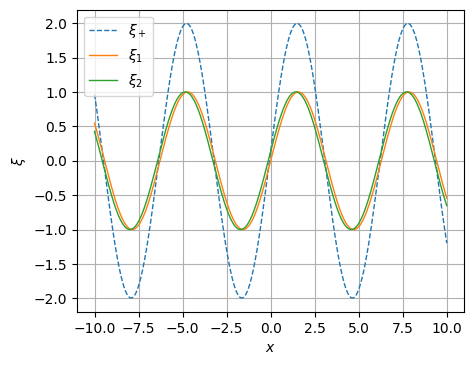

In [39]:
#A1Sin

xi0=1 # Amplitud
omega=1 # Frecuencia
k=1
t=0
#delta=2*np.pi

# Coord. espacial
x=np.linspace(x_ini, x_fin, nt)

## Ondas
xi1=xi0*np.sin(k*x-omega*t) # Onda 1
xi2=xi0*np.sin(k*x-omega*t+delta) # Onda 2
xi=2*xi0*np.cos(delta/2.)*np.sin(k*x-omega*t+delta/2.)   # Onda 1+2

##  Figura ##  
fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()

line0, = ax.plot(x,xi,'--', label='$ \\xi_+ $', linewidth=1)
line1, = ax.plot(x,xi1,'-', label='$ \\xi_1 $', linewidth=1)
line1, = ax.plot(x,xi2,'-', label='$ \\xi_2 $', linewidth=1)

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()

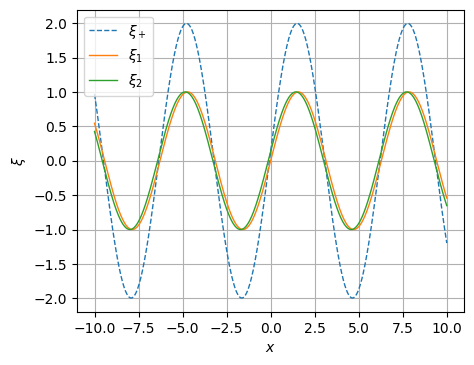

In [40]:
#A1exp

#xi0=1
#omega=1
#k=1
#t=0
#delta=2*np.pi
#x = np.linspace(x_ini, x_fin, nt)

# Ondas, formulación compleja
alpha1=k*x-omega*t;
xi1=xi0*np.exp(1j*alpha1)  # Onda 1
alpha2=k*x-omega*t+delta;
xi2=xi0*np.exp(1j*alpha2)  # Onda 2

xi=xi1+xi2 # Suma de las dos ondas

##  Figura ##  
fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()
# representamos la parte imaginaria de las ondas aplicando la función np.imag()
line0, = ax.plot(x,np.imag(xi),'--', label='$ \\xi_+ $', linewidth=1) # Onda 1+2
line1, = ax.plot(x,np.imag(xi1),'-', label='$ \\xi_1 $', linewidth=1) # Onda 1
line2, = ax.plot(x,np.imag(xi2),'-', label='$ \\xi_2 $', linewidth=1) # Onda 2 

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()

**b)** Estudia ahora analíticamente la interferencia entre dos ondas de la misma amplitud y frecuencia pero de velocidades opuestas. Estudiar lo que ocurre si la frecuencia de las ondas es ligeramente diferente. Simula la interferencia de estas ondas en los casos de tener la misma frecuancia y frecuencias ligeramente diferentes según para un valor de tiempo random según vuetro DNI.

In [41]:
# Tiempo al cual se estudiará como varía la interferencia con la frecuencia.
t=random.randrange(1,101,1) # (s) Tiempo para la simulación
print('Para t= {:.0E} s'.format(t))

Para t= 3E+01 s


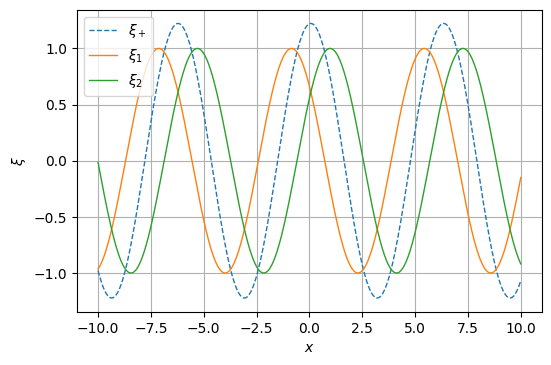

In [42]:
#A2Sin

#xi0=1
omega1=1.0
omega2=omega1
#print('Frecuencia total w= {:.2E} rad/s'.format(omega2))
k1=1
k2=-1
#t=1
#delta=np.pi

xi=np.zeros(nt)
x=np.linspace(x_ini, x_fin, nt)

xi1=[]
xi2=[]
xi1=xi0*np.sin(k1*x-omega1*t)  # Onda 1
xi2=xi0*np.sin(k2*x-omega2*t+delta) # Onda 2
xi=xi1+xi2  # Onda 1+2
  
fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6,4)
ax=plt.axes()

line0, = ax.plot(x,xi,'--', label='$ \\xi_+ $', linewidth=1) # Onda 1+2  
line1, = ax.plot(x,xi1,'-', label='$ \\xi_1 $', linewidth=1) # Onda 1
line2, = ax.plot(x,xi2,'-', label='$ \\xi_2 $', linewidth=1) # Onda 2

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()

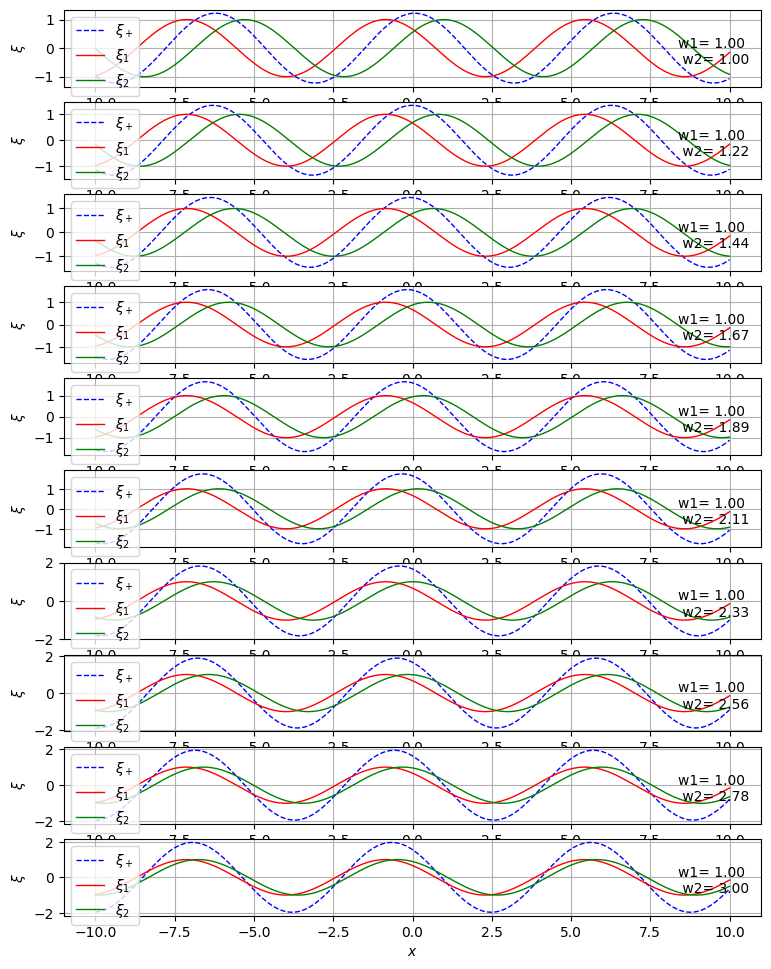

In [43]:
#A2Sin para varias frecuencias

#delta=np.pi
#dw=[0.1, 0.2, 0.5, 0.8] # Intervalo de frecuencias a estudiar
dw=np.linspace(0,2,10) # Intervalo de frecuencias a estudiar
ndw=np.size(dw)
#t=1

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(ndw)
fig.set_dpi(100)
fig.set_size_inches(9,12) #  (x, y)

xii=[]
nwi=0
for wi in dw:
  xi1=xi0*np.sin(k1*x-omega1*t) # Onda 1
  xi2=xi0*np.sin(k2*x-(omega1+wi)*t+delta) # Onda 2
  #print(omega1+wi)
  xii=xi1+xi2 # Onda 1+2

  ax[nwi].plot(x,xii,'--', label='$ \\xi_+$', linewidth=1, color='blue') # Onda 1+2
  ax[nwi].plot(x,xi1,'-', label='$ \\xi_1 $', linewidth=1, color='red') # Onda 1 
  ax[nwi].plot(x,xi2,'-', label='$ \\xi_2 $', linewidth=1, color= 'green') # Onda 2
  ax[nwi].annotate('w1= %0.2f \n w2= %0.2f '%(omega1,omega1+wi), (0.88, 0.3), xycoords='axes fraction')

  # Etiquetas de los ejes x e y
  ax[nwi].legend(loc='upper left') 
  ax[nwi].set_ylabel("$ \\xi $")
  ax[nwi].set_xlabel("$x$")
  ax[nwi].grid(True)
  nwi+=1



#plt.show()

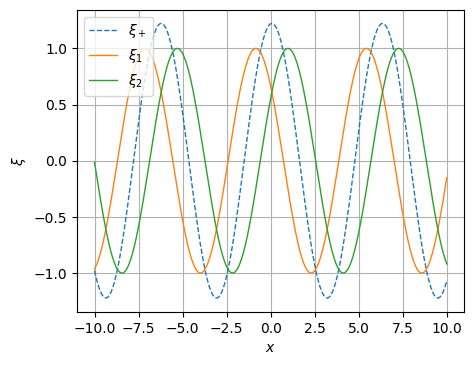

In [44]:
#A2exp, Representamos usando la formulación de Euler.

#xi0=1
#omega1=1.0
#omega2=1.0
#k1=1
#k2=-1
#t=0
#delta=0

#x = np.linspace(x_ini, x_fin, nt)

xi=np.zeros(nt)

alpha1=k1*x-omega1*t
xi1=xi0*np.exp(1j*alpha1)  # Onda 1
alpha2=k2*x-omega2*t+delta
xi2=xi0*np.exp(1j*alpha2)  # Onda 2
xi=xi1+xi2  # Onda 1+2

fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()

line0, = ax.plot(x,np.imag(xi),'--', label='$ \\xi_+ $', linewidth=1)  # Onda 1+2
line1, = ax.plot(x,np.imag(xi1),'-', label='$ \\xi_1 $', linewidth=1)  # Onda 1
line1, = ax.plot(x,np.imag(xi2),'-', label='$ \\xi_2 $', linewidth=1)  # Onda 2

# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$x$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()


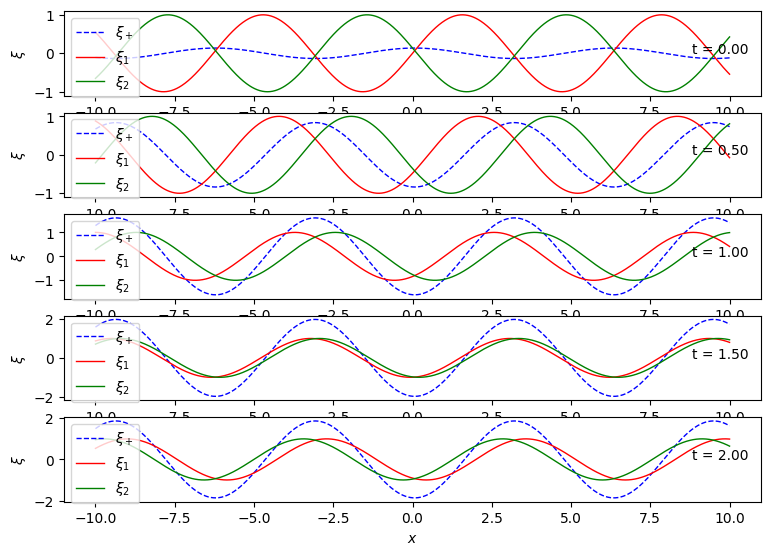

In [45]:
#A2Sin para diferentes tiempos

#omega1=1.0
#omega2=1.1

#dt=[1, 5, 10, 15, 30]
dt=np.linspace(0,2,5)
ndt=np.size(dt)

fig, ax = plt.subplots(ndt)
fig.set_dpi(100)
fig.set_size_inches(9,6.5)

xii=[]
xi1=[]
xi2=[]
nwi=0
for ti in dt:
  xi1=xi0*np.sin(k1*x-omega1*ti)  # Onda 1
  xi2=xi0*np.sin(k2*x-omega2*ti+delta)  # Onda 2
  
  xii=xi1+xi2   # Onda 1+2
  ax[nwi].plot(x,xii,'--', label='$ \\xi_+ $', linewidth=1, color='blue')  # Onda 1+2
  ax[nwi].plot(x,xi1,'-', label='$ \\xi_1 $', linewidth=1, color='red')   # Onda 1 
  ax[nwi].plot(x,xi2,'-', label='$ \\xi_2 $', linewidth=1, color= 'green')  # Onda 2
  ax[nwi].annotate('t = %0.2f '%(ti), (0.9, 0.5), xycoords='axes fraction')

  # Etiquetas de los ejes x e y
  ax[nwi].legend(loc='upper left') 
  ax[nwi].set_ylabel("$ \\xi $")
  ax[nwi].set_xlabel("$x$")
  nwi+=1


**c)** Una vez visto este ejemplo sencillo de interferencia de ondas vamos a estudiar la figura de interferencia sobre una pantalla de dos ondas en fase que se producen al incidir un frente de ondas plano en una pared con dos rendijas. Esta situación se muestra en la Figura 1. El objetivo es encontrar la amplitud (o la intensidad, que es proporcional al cuadrado de la amplitud) de la onda en la pantalla. 

La onda que se genera en la rendija superior produce una perturbación en el punto de la pantalla $P$, donde incide, que viene dada por 
$\xi_1=\xi_0 \sin(k r_1-\omega t)$, donde $r_1$ es la distancia de la rendija a $P$. De la misma manera, la perturbación producida por la onda que atraviesa la rendija inferior será $\xi_2=\xi_0 \sin(k r_2-\omega t)$. Aquí hemos supuesto que la amplitud de cada onda en el punto $P$ es la misma e igual a $\xi_0$. La pregunta es, ¿qué tipo de perturbación se produce en $P$? ¿Qué vale la amplitud?, ¿y la intensidad de la onda?

Representemos la intensidad en función de la posición de $P$ en la pantalla. Para responder a estas preguntas debemos obtener la suma de las ondas
$$\xi=\xi_0 \sin(k r_1-\omega t)+\xi_0 \sin(k r_2-\omega t)$$

Se pide demostrar analíticamente que esto representa una variación armónica con el tiempo, de pulsación $\omega$ en el punto $P$ considerado. Se pide también obtener la amplitud de la oscilación usando las expresiones que transforman sumas de senos o cosenos en productos y representar la amplitud e intensidad de la onda en función de la posición en la pantalla.
 Representar también la evolución de la perturbación con el tiempo en función de la posición en la pantalla. 

Las dos ondas producidas en las rendijas emiten coherentemente ya que la diferencia de fase entre ellas es constante (cero en este caso). Se pide estudiar analíticamente y con el programa python lo que ocurriría con la figura de interferencia si añadimos un desfase constante, distinto de cero. Tened en cuenta que el programa admite tambíen algebra con números complejos.





In [46]:
# Distancia a la cual se situa la pantalla
L=random.randrange(10,50,1)/10 # (m)
print('L= {:.1E} s'.format(t))
t=random.randrange(10,101,1) # (s) Tiempo al cual se estudia la interferencia
print('Para t= {:.0E} s'.format(t))

L= 2.9E+01 s
Para t= 3E+01 s


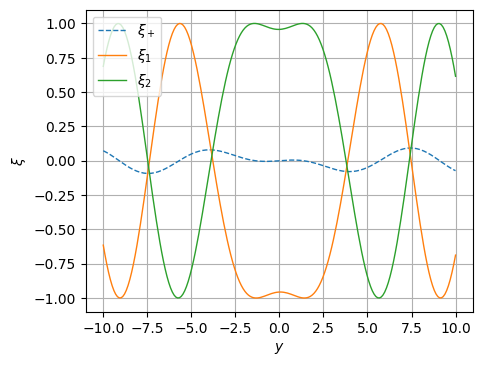

In [47]:
#A3Sin

xi01=1
xi02=1
omega=1
k=1
#t=70
delta=np.pi
#L=71 # 
d=0.1 # Distancia entre las rendijas

x=L
y_ini=-10
y_fin=10
y=np.linspace(y_ini, y_fin, 200);

r1=np.sqrt(x**2+(y-d/2.)**2)
r2=np.sqrt(x**2+(y+d/2.)**2)
xi1=xi01*np.sin(k*r1-omega*t)
xi2=xi02*np.sin(k*r2-omega*t+delta)
xi=xi1+xi2

fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()

line0, = ax.plot(y,xi,'--', label='$ \\xi_+ $', linewidth=1)
line1, = ax.plot(y,xi1,'-', label='$ \\xi_1 $', linewidth=1)
line1, = ax.plot(y,xi2,'-', label='$ \\xi_2 $', linewidth=1)
# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$y$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()


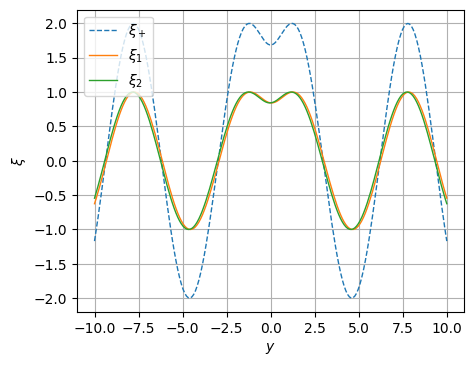

In [48]:
#A3exp

xi01=1
xi02=1
omega=1
k=1
t=0
delta=0
L=1 # 
d=0.1 # Distancia entre las rendijas

x=L
y=np.linspace(y_ini, y_fin, 200);

r1=np.sqrt(x**2+(y-d/2.)**2)
r2=np.sqrt(x**2+(y+d/2.)**2)
alpha1=k*r1-omega*t
alpha2=k*r2-omega*t+delta

xi1=xi01*np.exp(1j*alpha1)
xi2=xi02*np.exp(1j*alpha2)
xi=xi1+xi2

fig=plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5,4)
ax=plt.axes()

line0, = ax.plot(y,np.imag(xi),'--', label='$ \\xi_+ $', linewidth=1)
line1, = ax.plot(y,np.imag(xi1),'-', label='$ \\xi_1 $', linewidth=1)
line1, = ax.plot(y,np.imag(xi2),'-', label='$ \\xi_2 $', linewidth=1)
# Etiquetas de los ejes x e y 
ax.set_ylabel("$ \\xi $")
ax.set_xlabel("$y$")
ax.legend(loc='upper left')
ax.grid(True)
#
plt.show()


[University Physics Volume 3, Ch. 3. OpenStax](https://openstax.org/books/university-physics-volume-3/pages/3-introduction)

[Ángel Franco García. Interferencia y difracción](http://www.sc.ehu.es/sbweb/fisica_/ondas/ondas.html#interferencia)
